# Loading the data

In [57]:
import pandas as pd

data = pd.read_csv('Codeacademy_Webscrapper_20210107154307.csv')
data.head()

,Unnamed: 0,Topic Title,Category,Tags,Leading Comment,Other Comments,Likes,Views
0,0,[How to] Format code in posts,Getting Started,[],Codecademy Discuss posts are parsed with Markd...,[],21,13.9k
1,1,Guide: A list of how-to’s for giving and recei...,Getting Started,[],Technical guides will teach you how to use the...,[],0,0
2,2,Guide: Learn about our community forums,Getting Started,[],Take a moment and read through each of these b...,[],0,0
3,3,[How-to] Create a topic that everyone will read,Getting Started,[],A great topic is one that provides potential h...,[],0,0
4,4,[Learn More] How the forum is organized,Getting Started,[],"With Codecademy Community forums, conversation...",[],0,0


In [58]:
data.columns

Index(['Unnamed: 0', 'Topic Title', 'Category', 'Tags', 'Leading Comment',
       'Other Comments', 'Likes', 'Views'],
      dtype='object')

In [59]:
data.drop(columns= ['Unnamed: 0', 'Likes', 'Views'], inplace=True)
data

,Topic Title,Category,Tags,Leading Comment,Other Comments
0,[How to] Format code in posts,Getting Started,[],Codecademy Discuss posts are parsed with Markd...,[]
1,Guide: A list of how-to’s for giving and recei...,Getting Started,[],Technical guides will teach you how to use the...,[]
2,Guide: Learn about our community forums,Getting Started,[],Take a moment and read through each of these b...,[]
3,[How-to] Create a topic that everyone will read,Getting Started,[],A great topic is one that provides potential h...,[]
4,[Learn More] How the forum is organized,Getting Started,[],"With Codecademy Community forums, conversation...",[]
...,...,...,...,...,...
5459,Why does it ask me not to use compute_bill?,FAQ,['Python FAQ'],Question\nWhy does it ask me not to use comput...,['Question\nWhy does it ask me not to use comp...
5460,FAQ: Learn Python - Battleship - A Real Win,FAQ,['Python FAQ'],\nCommunity FAQs on Codecademy Python Exercise...,['\nCommunity FAQs on Codecademy Python Exerci...
5461,How should I indent the code to create my_tria...,FAQ,['Python FAQ'],Question\nHow should I indent the code to crea...,[]
5462,FAQ: Learn Python - Battleship - Not Again!,FAQ,['Python FAQ'],\nCommunity FAQs on Codecademy Python Exercise...,['\nCommunity FAQs on Codecademy Python Exerci...


In [137]:
data.drop(data.loc[df['Category']==Getting Started'].index, inplace=True)
data

,Unnamed: 0,Topic Title,Category,Tags,Leading Comment,Other Comments,Likes,Views
26,26,About the Get Help category,Get Help,[],"Ask questions, get help with an exercise, and ...",[],2,2.0k
27,27,Aren’t strings immutable?,Get Help,['Python'],Would anyone be able to tell me why the given ...,['Would anyone be able to tell me why the give...,20,1.8k
28,28,Ravenous Part 1 BusinessList Styling,Get Help,['React.js'],"Hey guys, After completed Rav part 1 all is se...","['Hey guys,\nAfter I completed Rav part 1 all ...",1,228
29,29,Tea Cozy project,Get Help,[],just started the tea cozy project and realized...,['I just started the tea cozy project and real...,0,16
30,30,Chore Door innerHTML error,Get Help,['JavaScript'],Hey! Heres the link to the exercise I’m workin...,['Hey! Heres the link to the exercise I’m work...,5,191
...,...,...,...,...,...,...,...,...
5459,5459,Why does it ask me not to use compute_bill?,FAQ,['Python FAQ'],Question Why does it ask me not to use compute...,['Question\nWhy does it ask me not to use comp...,15,8.7k
5460,5460,FAQ: Learn Python - Battleship - A Real Win,FAQ,['Python FAQ'],Community FAQs on Codecademy Python Exercises....,['\nCommunity FAQs on Codecademy Python Exerci...,0,1.2k
5461,5461,How should I indent the code to create my_tria...,FAQ,['Python FAQ'],Question How should indent the code to create ...,[],0,0
5462,5462,FAQ: Learn Python - Battleship - Not Again!,FAQ,['Python FAQ'],Community FAQs on Codecademy Python Exercises....,['\nCommunity FAQs on Codecademy Python Exerci...,12,1.4k


# Strategy 1

* Lower case all the words

* Replaced by space these [/(){}[]\'\“\”\’|@,;]

* Removed these [^0-9a-z #+_]


# Explore the data

In [138]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [139]:
df = data.copy()

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5438 entries, 26 to 5463
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5438 non-null   int64 
 1   Topic Title      5438 non-null   object
 2   Category         5438 non-null   object
 3   Tags             5438 non-null   object
 4   Leading Comment  5438 non-null   object
 5   Other Comments   5438 non-null   object
 6   Likes            5438 non-null   object
 7   Views            5438 non-null   object
dtypes: int64(1), object(7)
memory usage: 382.4+ KB


In [141]:
df['post'] = df['Topic Title'] + ' ' + df['Tags']+ ' '+ df['Leading Comment']

df['post'].head()

26    About the Get Help category [] Ask questions, ...
27    Aren’t strings immutable? ['Python'] Would any...
28    Ravenous Part 1 BusinessList Styling ['React.j...
29    Tea Cozy project [] just started the tea cozy ...
30    Chore Door innerHTML error ['JavaScript'] Hey!...
Name: post, dtype: object

In [142]:
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

813298


In [143]:
df['Category'].unique()

array(['Get Help', 'Community', 'Projects', 'FAQ'], dtype=object)

Text(0, 0.5, 'no of posts')

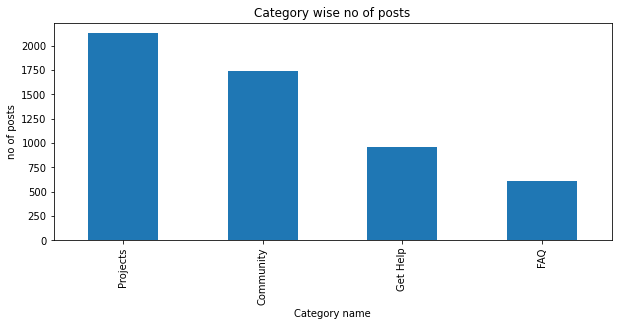

In [149]:
my_categories = [ 'Get Help',
       'Community', 'Projects', 'FAQ']
plt.figure(figsize=(10,4))
df.Category.value_counts().plot(kind='bar');
# Add title and axis names
plt.title('Category wise no of posts')
plt.xlabel('Category name')
plt.ylabel('no of posts')

# Text Pre-processing

In [146]:
test_df = df.copy()

In [147]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
test_df['post'] = test_df['post'].apply(clean_text)

# Modeling the data

In [151]:
X = test_df.post
y = test_df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [152]:
X_train.head()

2900    u.s medical insurance project. feedback needed...
2153    why is lua not part in game development?   sug...
5313    can we sort numpy arrays in reverse order?   p...
3933    capstone project: netflix data   skill path pr...
1916     fixed  4. zip - lists and loops cheatsheet er...
Name: post, dtype: object

In [153]:
y_train.head()

2900     Projects
2153    Community
5313          FAQ
3933     Projects
1916    Community
Name: Category, dtype: object

# Naive Bayes Classifier for Multinomial Models

### CountVectorizer + TF-IDFTransformer + MultinomialNB

In [154]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6397058823529411
              precision    recall  f1-score   support

    Get Help       0.69      0.89      0.78       521
   Community       1.00      0.07      0.13       184
    Projects       1.00      0.01      0.01       318
         FAQ       0.60      0.93      0.73       609

    accuracy                           0.64      1632
   macro avg       0.82      0.47      0.41      1632
weighted avg       0.75      0.64      0.54      1632



# Linear Support Vector Machine

### CountVectorizer + TF-IDFTransformer + SGDClassifier

In [155]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1321 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.7757352941176471
              precision    recall  f1-score   support

    Get Help       0.80      0.89      0.85       521
   Community       0.78      0.96      0.86       184
    Projects       0.83      0.19      0.31       318
         FAQ       0.75      0.92      0.83       609

    accuracy                           0.78      1632
   macro avg       0.79      0.74      0.71      1632
weighted avg       0.79      0.78      0.74      1632



# Logistic Regression

### CountVectorizer + TF-IDFTransformer + Logistic Regression


In [156]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1331 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.8082107843137255
              precision    recall  f1-score   support

    Get Help       0.83      0.87      0.85       521
   Community       0.91      0.96      0.93       184
    Projects       0.66      0.53      0.58       318
         FAQ       0.82      0.86      0.84       609

    accuracy                           0.81      1632
   macro avg       0.80      0.80      0.80      1632
weighted avg       0.80      0.81      0.80      1632



# Decision Tree

### CountVectorizer + TF-IDFTransformer + DecisionTreeClassifier

In [157]:
from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0)),
               ])
dtree.fit(X_train, y_train)

y_pred = dtree.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1341 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.7696078431372549
              precision    recall  f1-score   support

    Get Help       0.78      0.83      0.80       521
   Community       0.99      0.97      0.98       184
    Projects       0.57      0.50      0.53       318
         FAQ       0.79      0.80      0.79       609

    accuracy                           0.77      1632
   macro avg       0.78      0.77      0.78      1632
weighted avg       0.76      0.77      0.77      1632



# Results

### Results of the previously trained models

In [158]:
import pandas as pd

results = pd.DataFrame({'Model': ['Naive Bayes MultinomialNB', 'Linear SVM', 'Logistic Regression', 'Decision Tree'],
                         'Accuracy': [res1311, res1321, res1331, res1341]})
results.set_index('Model')
results.sort_values(by='Accuracy')

,Model,Accuracy
0,Naive Bayes MultinomialNB,0.639706
3,Decision Tree,0.769608
1,Linear SVM,0.775735
2,Logistic Regression,0.808211


# Cross Validation with linear SVM

In [159]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
cv_res_sgd = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd = np.mean(cv_res_sgd)

In [160]:
print(mean_cv_res_sgd)

0.8016335129161487


# Strategy 2

* Remove stop words (+ what was done in Strategy 1)

In [161]:
test_df2 = test_df.copy()

In [162]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
test_df2['post'] = test_df2['post'].apply(clean_text)

# Modeling the data

In [164]:
X = test_df2.post
y = test_df2.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [165]:
X_train.head()

2900    u.s medical insurance project. feedback needed...
2153    lua part game development? suggestions feature...
5313    sort numpy arrays reverse order? python faq qu...
3933    capstone project: netflix data skill path proj...
1916    fixed 4. zip - lists loops cheatsheet error? b...
Name: post, dtype: object

In [166]:
y_train.head()

2900     Projects
2153    Community
5313          FAQ
3933     Projects
1916    Community
Name: Category, dtype: object

# Naive Bayes Classifier for Multinomial Models

### CountVectorizer + TF-IDFTransformer + MultinomialNB

In [167]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res2311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6501225490196079
              precision    recall  f1-score   support

    Get Help       0.74      0.86      0.80       521
   Community       1.00      0.17      0.29       184
    Projects       0.89      0.03      0.05       318
         FAQ       0.58      0.94      0.72       609

    accuracy                           0.65      1632
   macro avg       0.80      0.50      0.46      1632
weighted avg       0.74      0.65      0.56      1632



# Linear Support Vector Machine

### CountVectorizer + TF-IDFTransformer + SGDClassifier

In [168]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res2321 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.7806372549019608
              precision    recall  f1-score   support

    Get Help       0.81      0.90      0.85       521
   Community       0.83      0.96      0.89       184
    Projects       0.82      0.19      0.31       318
         FAQ       0.74      0.93      0.83       609

    accuracy                           0.78      1632
   macro avg       0.80      0.75      0.72      1632
weighted avg       0.79      0.78      0.74      1632



# Logistic Regression

### CountVectorizer + TF-IDFTransformer + Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res2331 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.7996323529411765
              precision    recall  f1-score   support

    Get Help       0.83      0.86      0.84       521
   Community       0.91      0.97      0.94       184
    Projects       0.63      0.48      0.55       318
         FAQ       0.81      0.86      0.83       609

    accuracy                           0.80      1632
   macro avg       0.79      0.79      0.79      1632
weighted avg       0.79      0.80      0.79      1632



c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

### CountVectorizer + TF-IDFTransformer + DecisionTreeClassifier

In [170]:
from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0)),
               ])
dtree.fit(X_train, y_train)

y_pred = dtree.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res2341 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.772671568627451
              precision    recall  f1-score   support

    Get Help       0.80      0.82      0.81       521
   Community       0.95      0.96      0.96       184
    Projects       0.58      0.50      0.54       318
         FAQ       0.78      0.82      0.80       609

    accuracy                           0.77      1632
   macro avg       0.78      0.77      0.78      1632
weighted avg       0.77      0.77      0.77      1632



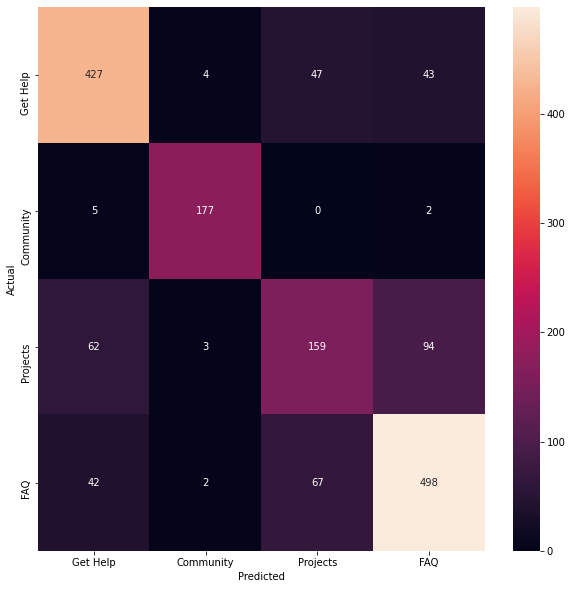

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Results

### Results of the previously trained models

In [172]:
import pandas as pd

results = pd.DataFrame({'Model': ['Naive Bayes MultinomialNB', 'Linear SVM', 'Logistic Regression', 'Decision Tree'],
                         'Accuracy': [res2311, res2321, res2331, res2341]})
results.set_index('Model')
results.sort_values(by='Accuracy')

,Model,Accuracy
0,Naive Bayes MultinomialNB,0.650123
3,Decision Tree,0.772672
1,Linear SVM,0.780637
2,Logistic Regression,0.799632


#### So after removing the stop words the accuracy of the maximum accurate machine learning model slightly decreases.

# Cross Validation with linear SVM

In [173]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
cv_res_sgd2 = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd2 = np.mean(cv_res_sgd2)

In [174]:
print(mean_cv_res_sgd2)

0.8005836441497445


#  Strategy 3

* text.replace(r'\n', ' ') & Remove digits and words containing digits (+ what was done in Strategy 2)

In [175]:
test_df3 = test_df2.copy()

In [176]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
DIGITS_RE=re.compile('\w*\d\w*')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = text.replace(r'\n', ' ')
    #text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    text = DIGITS_RE.sub('', text)
    return text
    
test_df3['post'] = test_df3['post'].apply(clean_text)

# Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=500, max_depth=500, random_state=0)),
               ])

cv_res_rf = cross_val_score(rf, X_train, y_train, cv=10)
mean_cv_res_rf = np.mean(cv_res_rf)

In [179]:
print(mean_cv_res_rf)#max_depth =500, n_estimators=500

0.8292146705346042


In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=200, max_depth=100, random_state=0)),
               ])

cv_res_rf_tfidf = cross_val_score(rf, X_train, y_train, cv=10)
mean_cv_res_rf_tfidf = np.mean(cv_res_rf_tfidf)

In [181]:
mean_cv_res_rf_tfidf# max_depth = 100, n_estimators=200

0.8234300317723442

#### Using TF-IDF as a vectorizer and transformer is slighly better than using CountVectorizer as a Vectorizer.

In [182]:
# from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None)),
               ])
cv_res_sgd_tfidf = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd_tfidf = np.mean(cv_res_sgd_tfidf)

In [183]:
mean_cv_res_sgd_tfidf #100 in max_iter

0.7887567343555739

# XGBoost

In [184]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [185]:
import xgboost as xgb

xgb = Pipeline(steps=[('vect', TfidfVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

cv_res_xgb_tfidf = cross_val_score(xgb, X_train, y_train, cv=10)
mean_cv_res_xgb_tfidf = np.mean(cv_res_xgb_tfidf)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [186]:
mean_cv_res_xgb_tfidf

0.8612819450200304

In [187]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

[23:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [188]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
res_xgb = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.8535539215686274
              precision    recall  f1-score   support

    Get Help       0.87      0.91      0.89       521
   Community       0.98      0.98      0.98       184
    Projects       0.75      0.57      0.65       318
         FAQ       0.84      0.92      0.88       609

    accuracy                           0.85      1632
   macro avg       0.86      0.84      0.85      1632
weighted avg       0.85      0.85      0.85      1632



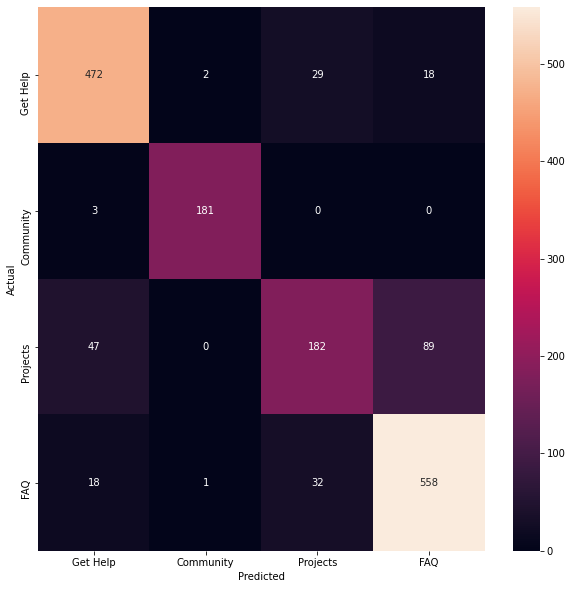

In [189]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [190]:
import lightgbm as lgbm

tfidf_vec = TfidfVectorizer(dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)
X_data_tfidf = tfidf_vec.fit_transform(test_df3['post'])
X_train_tfidf = tfidf_vec.transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

clf_LGBM = lgbm.LGBMClassifier(objective='multiclass', verbose=-1, learning_rate=0.5, max_depth=20, num_leaves=50, n_estimators=120, max_bin=2000,)
clf_LGBM.fit(X_train_tfidf, y_train, verbose=-1)
predicted_LGBM = clf_LGBM.predict(X_test_tfidf)

In [191]:
cv_res_lgbm_tfidf = cross_val_score(clf_LGBM, X_train_tfidf, y_train, cv=10)
mean_cv_res_lgbm_tfidf = np.mean(cv_res_lgbm_tfidf)

In [192]:
mean_cv_res_lgbm_tfidf

0.8649627020306673

In [193]:
print('accuracy %s' % accuracy_score(predicted_LGBM, y_test))
res_lgbm = accuracy_score(predicted_LGBM, y_test)
print(classification_report(y_test, predicted_LGBM,target_names=my_categories))

accuracy 0.8566176470588235
              precision    recall  f1-score   support

    Get Help       0.88      0.90      0.89       521
   Community       0.99      0.98      0.99       184
    Projects       0.73      0.59      0.66       318
         FAQ       0.85      0.92      0.88       609

    accuracy                           0.86      1632
   macro avg       0.86      0.85      0.85      1632
weighted avg       0.85      0.86      0.85      1632



#### Got maximum accuracy of 85.66 % after training Lightgbm.

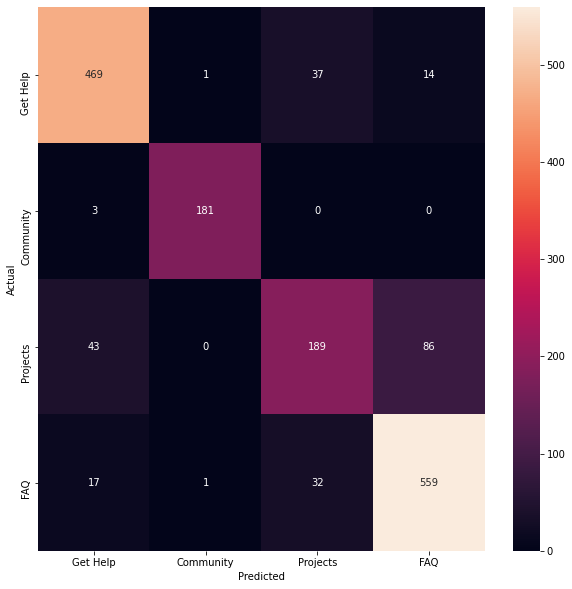

In [194]:
conf_mat = confusion_matrix(y_test, predicted_LGBM)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [120]:
data = pd.read_csv('Codeacademy_Webscrapper_20210107154307.csv')

In [121]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDSv2 = [word.upper() for word in STOPWORDS]

In [122]:
STOPWORDSv2

['BY',
 'FOR',
 'I',
 'TO',
 'JUST',
 'IN',
 'VE',
 'AT',
 'NO',
 "SHE'S",
 "YOU'VE",
 'YOUR',
 'WHY',
 'ABOVE',
 'THE',
 'OURS',
 'MY',
 'MA',
 "THAT'LL",
 'DID',
 'SAME',
 'ABOUT',
 "DON'T",
 'WHOM',
 'CAN',
 "MUSTN'T",
 'THEY',
 'HAVEN',
 'HE',
 'HIM',
 'THIS',
 'RE',
 'ANY',
 'DON',
 'THAT',
 'AS',
 'WITH',
 'WOULDN',
 'WHERE',
 'AFTER',
 "YOU'RE",
 "YOU'D",
 'SUCH',
 'BUT',
 'AND',
 'TOO',
 'HIS',
 'BEING',
 'WHO',
 'MIGHTN',
 'MOST',
 'SHOULD',
 'AREN',
 "YOU'LL",
 'OWN',
 'AGAINST',
 'ONLY',
 'YOURS',
 'IT',
 "NEEDN'T",
 "WASN'T",
 'IF',
 'FROM',
 'HAVE',
 'THEN',
 "SHAN'T",
 "IT'S",
 'OUR',
 'WE',
 'THESE',
 'THROUGH',
 'Y',
 "WON'T",
 'ISN',
 'WAS',
 'BEFORE',
 "HAVEN'T",
 'WHEN',
 'SOME',
 'HAVING',
 'T',
 'HERSELF',
 "AREN'T",
 'ME',
 'M',
 "DOESN'T",
 'YOURSELVES',
 'THEM',
 'COULDN',
 'LL',
 'D',
 "HASN'T",
 'VERY',
 'YOU',
 'INTO',
 'HAD',
 'HADN',
 'DOWN',
 'AIN',
 'AGAIN',
 'SHOULDN',
 'MORE',
 'WHICH',
 'OR',
 'MUSTN',
 'AN',
 "WOULDN'T",
 'THEIR',
 'NOW',
 "WEREN'T",


In [123]:
def clean_data(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = ' '.join(word for word in text.split() if word not in STOPWORDSv2) # delete stopwors from text
    return text
    
data['Leading Comment'] = data['Leading Comment'].apply(clean_data)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.codecademy.com/paths/web-development/tracks/styling-a-website/modules/learn-css-selectors-visual-rules/lessons/css-setup-selectors/exercises/intro-to-css" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [124]:
data['Leading Comment'].head()

0    Codecademy Discuss posts are parsed with Markd...
1    Technical guides will teach you how to use the...
2    Take a moment and read through each of these b...
3    great topic is one that provides potential hel...
4    With Codecademy Community forums, conversation...
Name: Leading Comment, dtype: object

In [125]:
upcase_words = {}
regex = r"([A-Z]{3})"

for i, row in zip(range(500), data['Leading Comment'][:500]):
    row = data['Leading Comment'].str.findall(regex)[i]
    if len(row) != 0:
        upcase_words[i] = row

In [126]:
df_upword = pd.DataFrame(upcase_words.items(), columns=['Original Index', 'Upper Case Words'])

In [127]:
df_upword.head()

,Original Index,Upper Case Words
0,0,[HTM]
1,3,[URL]
2,11,"[HTM, HTM]"
3,14,"[HTM, BBC]"
4,15,"[FAQ, NOT, TOS]"


In [128]:
df_upword['Number of UpCase Words'] =  df_upword['Upper Case Words'].apply(lambda x: len(x))

In [129]:
df_upword.head()

,Original Index,Upper Case Words,Number of UpCase Words
0,0,[HTM],1
1,3,[URL],1
2,11,"[HTM, HTM]",2
3,14,"[HTM, BBC]",2
4,15,"[FAQ, NOT, TOS]",3


In [130]:
df_upword['Number of UpCase Words'].values.max()

77

In [131]:
df_upword['Number of UpCase Words'][df_upword['Number of UpCase Words'].values == 77]

33    77
Name: Number of UpCase Words, dtype: int64

In [132]:
df_upword['Number of UpCase Words'][33]

77

In [133]:
df_upword['Upper Case Words'][33]

['CRE',
 'ATE',
 'TAB',
 'DEC',
 'IMA',
 'NUL',
 'DEF',
 'AUL',
 'PRI',
 'MAR',
 'KEY',
 'VAR',
 'CHA',
 'NUL',
 'DEC',
 'IMA',
 'NUL',
 'DEF',
 'AUL',
 'DEC',
 'IMA',
 'NUL',
 'UNI',
 'QUE',
 'CRE',
 'ATE',
 'TAB',
 'VAR',
 'CHA',
 'UNI',
 'QUE',
 'NUL',
 'PRI',
 'MAR',
 'KEY',
 'VAR',
 'CHA',
 'NUL',
 'VAR',
 'CHA',
 'NUL',
 'VAR',
 'CHA',
 'VAR',
 'CHA',
 'DAT',
 'NUL',
 'VAR',
 'CHA',
 'NUL',
 'DEC',
 'IMA',
 'NUL',
 'DEC',
 'IMA',
 'DEC',
 'IMA',
 'NUL',
 'DEF',
 'AUL',
 'DEC',
 'IMA',
 'NUL',
 'DEF',
 'AUL',
 'FOR',
 'EIG',
 'KEY',
 'REF',
 'ERE',
 'NCE',
 'FOR',
 'EIG',
 'KEY',
 'REF',
 'ERE',
 'NCE']

In [134]:
abb = {}
for word in df_upword['Upper Case Words'][33]:
    if word in abb.keys():
        abb[word] += 1
    else:
        abb[word] = 1

In [135]:
abb

{'CRE': 2,
 'ATE': 2,
 'TAB': 2,
 'DEC': 7,
 'IMA': 7,
 'NUL': 12,
 'DEF': 4,
 'AUL': 4,
 'PRI': 2,
 'MAR': 2,
 'KEY': 4,
 'VAR': 7,
 'CHA': 7,
 'UNI': 2,
 'QUE': 2,
 'DAT': 1,
 'FOR': 2,
 'EIG': 2,
 'REF': 2,
 'ERE': 2,
 'NCE': 2}

# The ones that looks legilible to me are: 
'CRE',
 'ATE',
 'TAB',
 **'DEC'**,
 **'IMA'**,
 **'NUL'**,
 'DEF',
 'AUL',
 'PRI',
 'MAR',
 'KEY',
 **'VAR',
 'CHA',**
 'UNI',
 'QUE',
 'DAT',
 'FOR',
 'EIG',
 'REF',
 'ERE',
 'NCE'}
**The ones that looks leg**